Local imports and initialization

In [20]:
import yaml
import sys, os

from IPython.display import Image, SVG

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from src.utils import *
from src.svg_quality_checks import *
from src.gpt_wrappers import *

# show svg 
def show_svg(file):
    display(SVG(file))

# load yaml config
with open("../config.yml", "r") as f:
    config = yaml.safe_load(f)


OpenAI and wandb related imports and initialization

In [3]:
import openai
import wandb

openai.api_key = config["OPENAI_KEY"]

run = wandb.init(
    project=config['WANDB_PROJECT'], 
    entity=config['WANDB_ENTITY']
)

results_table = wandb.Table(
    columns=[
                "system_prompt", 
                "question_prompt",
                "input_svg",
                "output_svg",
                "input_svg_code",
                "output_svg_code",
                "valid_check",
                "size_check"
    ]
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: diacritica (penpot_protoprompt). Use `wandb login --relogin` to force relogin


# Zero-shot learning (no examples)

In [4]:
system_prompt = """
    You are an expert in user interface design with a focus on progressive and responsive webapp designs.
    You understand and manipulate design systems, design elements, design components and design tokens.
    You deal professionally with SVG files, you know the entire SVG version 1.1 specification by heart.
    You know how to create both simple and complex designs elements using SVG version 1.1.
    Your main job is to take initial SVG version 1.1 files and create derivative syntactically correct SVG output using additional instructions and inputs.
    You are able to translate high level abstractions such as icons, shapes and layers into SVG elements and properties.
    Your only allowed output for any query is SVG version 1.1 compatible files.
"""

Case 0: generate a simple SVG

In [23]:
question = f"""
As fast as you can, generate SVG that shows a rectangle 300x300 that has the text 'HELLO WORLD!' in it.
"""

chatgpt = VanillaChatGPTWrapper(system_prompt)
answer = chatgpt.generate(question)
print(answer)
print("Quality check:", validate_svg(answer), get_svg_size(answer))

<svg width="300" height="300">
  <rect width="100%" height="100%" style="fill: white; stroke: black;" />
  <text x="50%" y="50%" dominant-baseline="middle" text-anchor="middle" font-size="50">HELLO WORLD!</text>
</svg>
Quality check: True (300.0, 300.0)


## Case 1: bottom app bar
### Case 1.1 Add a "+" on the right side of the bottom app bar


bottom_app_bar_short_optimized.svg:
Done in 61 ms!
12.4 KiB - 60.7% = 4.877 KiB


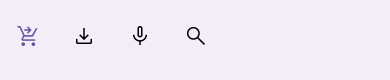

In [5]:
FILENAME = "bottom_app_bar_short"
svg_original = load_raw_svg_optimize_clean(FILENAME)
show_svg(f'../data/svgs/{FILENAME}_optimized.svg')

In [13]:
question = f"""

    This is a SVG file containing four distinct elements: \n

    {svg_original}

    As fast as you can, take the above input and reverse the order of those four elements, then generate the resulting output SVG.
"""

chatgpt = VanillaChatGPTWrapper(system_prompt)
answer = chatgpt.generate(question)
print(answer)
print("Quality check:", validate_svg(answer), get_svg_size(answer))

KeyboardInterrupt: 


bottom_app_bar_short_optimized.svg:
Done in 7 ms!
0.08 KiB - 1.2% = 0.079 KiB


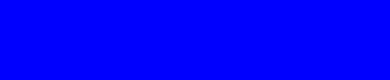

In [55]:
save_gpt_answer_as_svg(answer, FILENAME)
show_svg(f'../generated_data/{FILENAME}_optimized.svg')

In [18]:
results_table.add_data(
    *[
        system_prompt, question, wandb.Html(f'../data/svgs/{FILENAME}_optimized.svg'),
        wandb.Html(f'../generated_data/{FILENAME}_optimized.svg'),
        svg_original, answer,
        validate_svg(answer), get_svg_size(answer)
    ]
)

## Case 2: filled button
### Case 2.1: generate other buttons


common_buttons_short_optimized.svg:
Done in 29 ms!
3.814 KiB - 68.6% = 1.199 KiB


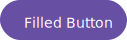

In [14]:
FILENAME = "common_buttons_short"
svg_original = load_raw_svg_optimize_clean(FILENAME)
show_svg(f'../data/svgs/{FILENAME}_optimized.svg')

In [15]:
question = f"""
    This is XML for the SVG file with a single button filled with color: \n

    {svg_original}

    Generate SVG with same button, but variants: filled, elevated and outlined.

    Keep it as short and optimized as you can. 
    Place buttons one under another, adjust the SVG size accordingly.
    Start with <svg ... and end with </svg>
"""

chatgpt = VanillaChatGPTWrapper(system_prompt)
answer = chatgpt.generate(question)
print(answer)
print("Quality check:", validate_svg(answer), get_svg_size(answer))

<svg width="127" height="120" style="-webkit-print-color-adjust:exact" fill="none">
  <g class="fills">
    <rect rx="0" ry="0" width="126" height="40" class="frame-background"/>
  </g>
  <g class="frame-children">
    <defs>
      <clipPath class="frame-clip-def frame-clip" id="a">
        <rect rx="0" ry="0" width="127" height="40"/>
      </clipPath>
    </defs>
    <g clip-path="url(#a)">
      <g class="fills">
        <rect rx="0" ry="0" width="127" height="40" class="frame-background"/>
      </g>
      <g class="frame-children">
        <rect rx="20" ry="20" width="127" height="40" style="opacity:1;fill:#6750a4;fill-opacity:1" class="fills"/>
      </g>
    </g>
  </g>
</svg>

<svg width="127" height="120" style="-webkit-print-color-adjust:exact" fill="none">
  <g class="fills">
    <rect rx="0" ry="0" width="126" height="40" class="frame-background"/>
  </g>
  <g class="frame-children">
    <defs>
      <clipPath class="frame-clip-def frame-clip" id="a">
        <rect rx="0" r

ParseError: junk after document element: line 22, column 0 (<string>)

In [12]:
save_gpt_answer_as_svg(answer, FILENAME)
show_svg(f'../generated_data/{FILENAME}_optimized.svg')

ParseError: unclosed token: line 1, column 3374 (<string>)

In [81]:
results_table.add_data(
    *[
        system_prompt, question, wandb.Html(f'../data/svgs/{FILENAME}_optimized.svg'),
        wandb.Html(f'../generated_data/{FILENAME}_optimized.svg'),
        svg_original, answer,
        validate_svg(answer), get_svg_size(answer)
    ]
)

ParseError: junk after document element: line 36, column 0 (<string>)

## Case 3: segmented buttons
### Case 3.1: make other buttons active one by one


segmented_buttons_short_optimized.svg:
Done in 62 ms!
13.162 KiB - 70.3% = 3.909 KiB


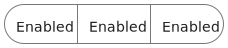

In [5]:
FILENAME = "segmented_buttons_short"
svg_original = load_raw_svg_optimize_clean(FILENAME)
show_svg(f'../data/svgs/{FILENAME}_optimized.svg')

In [83]:
question = f"""
    This is XML for the SVG file with 3 empty segmented buttons panel: \n

    {svg_original}

    Generate SVG with 1 new panel with middle button pressed and active.

    Keep it as short and optimized as you can. 
    Start with <svg ... and end with </svg>
"""

chatgpt = VanillaChatGPTWrapper(system_prompt)
answer = chatgpt.generate(question)
print("Quality check:", validate_svg(answer), get_svg_size(answer))

Quality check: True (228.0, 48.0)


In [65]:
save_gpt_answer_as_svg(answer, FILENAME)
show_svg(f'../generated_data/{FILENAME}_optimized.svg')

ParseError: unclosed token: line 1, column 2656 (<string>)

In [6]:
results_table.add_data(
    *[
        system_prompt, question, wandb.Html(f'../data/svgs/{FILENAME}_optimized.svg'),
        wandb.Html(f'../generated_data/{FILENAME}_optimized.svg'),
        svg_original, answer,
        validate_svg(answer), get_svg_size(answer)
    ]
)

NameError: name 'results_table' is not defined

## Case 4: switches
### Case 4.1 select elements + change the color palette


switch_full_optimized.svg:
Done in 110 ms!
22.691 KiB - 63.9% = 8.196 KiB


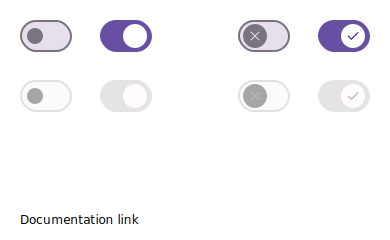

In [7]:
FILENAME = "switch_full"
svg_original = load_raw_svg_optimize_clean(FILENAME)
show_svg(f'../data/svgs/{FILENAME}_optimized.svg')

In [18]:
question = f"""
    This is XML for the SVG file with switch elements: \n

    {svg_original}

    Take only 2 switches.
    Generate a new SVG with these switches, with colors changed - they should be shades of green.

    Keep it as short and optimized as you can. 
    Start with <svg ... and end with </svg>
"""

chatgpt = VanillaChatGPTWrapper(system_prompt)
answer = chatgpt.generate(question)
print("Quality check:", validate_svg(answer), get_svg_size(answer))

Quality check: True (390.0, 240.0)



switch_full_optimized.svg:
Done in 13 ms!
0.324 KiB - 16.9% = 0.27 KiB


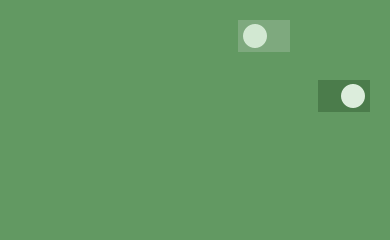

In [19]:
save_gpt_answer_as_svg(answer, FILENAME)
show_svg(f'../generated_data/{FILENAME}_optimized.svg')

In [68]:
results_table.add_data(
    *[
        system_prompt, question, wandb.Html(f'../data/svgs/{FILENAME}_optimized.svg'),
        wandb.Html(f'../generated_data/{FILENAME}_optimized.svg'),
        svg_original, answer,
        validate_svg(answer), get_svg_size(answer)
    ]
)

ParseError: unclosed token: line 1, column 3388 (<string>)

## Publish results to wandb

In [19]:
run.log({"results_table": results_table})